In [67]:
import numpy as np
import matplotlib.pyplot as plt

In [68]:
np.random.seed(4)

N = 30
N_test = 20 

# random numbers as Nx1 matrix
X = np.random.rand(N, 1) * 5
y = 3*(X -2) * (X - 3)*(X-4) +  10*np.random.randn(N, 1)

X_test = (np.random.rand(N_test, 1) - 1/8) * 10
y_test = 3*(X_test -2) * (X_test - 3)*(X_test-4) +  10*np.random.randn(N_test, 1)

In [74]:
d = 4
a = np.ones((X.shape[0], 1))
b = np.ones((X_test.shape[0], 1))

for i in range(1, d + 1):
    a = np.concatenate((a, X ** i), axis=1)
    b = np.concatenate((b, X_test ** i), axis=1)

In [75]:
w = np.linalg.pinv(a.T @ a) @ a.T @ y

In [76]:
w

array([[-70.11099235],
       [ 74.66197229],
       [-24.91080481],
       [  2.11241837],
       [  0.13285956]])

In [77]:
np.ravel(w)

array([-70.11099235,  74.66197229, -24.91080481,   2.11241837,
         0.13285956])

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(a, y)

w = model.coef_

In [89]:
w = np.ravel(w)

(-4.0, 10.0, -179.605496454863, 136.56718470112673)

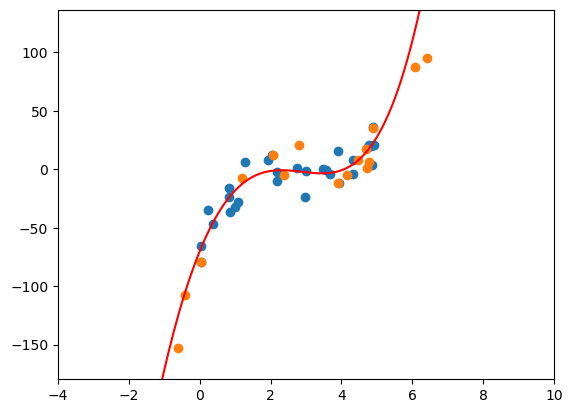

In [91]:
x0 = np.linspace(-2, 7, 200, endpoint=True)
y0 = np.zeros_like(x0)

for i in range(len(x0)):
    for j in range(0, d + 1):
        y0[i] += x0[i] ** j * w[j]

plt.scatter(X, y);
plt.scatter(X_test, y_test)
plt.plot(x0, y0, c="r")
plt.axis((-4, 10, np.amin(y) - 100, np.amax(y) + 100))